# Credit Card Fraud Detection


- Credit card companies are able to **recognize fraudulent** credit card transactions so that customers are **not charged** for items that they did **not purchase**.
- Problem Type: **Classification**
- Library Used: **TensorFlow, Sklearn, Keras**

In [ ]:
# Tensforflow libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D

# Data processing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

print(tf.__version__)

2.14.0


## Importing Data from CSV

In [ ]:
data = pd.read_csv("/content/creditcard.csv")

## Exploring the Dataset
* This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions
* features V1 - V28 are a result of the PCA transformation and are simply numerical representations.
* Amount is the value in dollars of the transaction
* Time variable is the amount of time that passed from the time when the first transaction took place.
* Fraud = 1 , Not Fraud = 0

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15946 entries, 0 to 15945
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15946 non-null  int64  
 1   V1      15946 non-null  float64
 2   V2      15946 non-null  float64
 3   V3      15946 non-null  float64
 4   V4      15946 non-null  float64
 5   V5      15946 non-null  float64
 6   V6      15946 non-null  float64
 7   V7      15946 non-null  float64
 8   V8      15946 non-null  float64
 9   V9      15946 non-null  float64
 10  V10     15946 non-null  float64
 11  V11     15946 non-null  float64
 12  V12     15946 non-null  float64
 13  V13     15946 non-null  object 
 14  V14     15946 non-null  float64
 15  V15     15946 non-null  float64
 16  V16     15946 non-null  float64
 17  V17     15946 non-null  float64
 18  V18     15946 non-null  float64
 19  V19     15946 non-null  float64
 20  V20     15945 non-null  float64
 21  V21     15945 non-null  float64
 22

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,15946.000000,15946.000000,15946.000000,15946.000000,15946.000000,15946.000000,15946.000000,15946.000000,15946.000000,15946.000000,...,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15944.000000,15943.000000
mean,10436.822212,-0.207397,0.276572,0.857069,0.319773,-0.120209,0.116081,-0.169319,-0.019630,1.039222,...,-0.065223,-0.149955,-0.034413,0.010251,0.112598,0.088604,0.006614,0.005622,62.544593,0.004328
std,7302.987860,1.706861,1.395963,1.541456,1.489029,1.283823,1.309822,1.224144,1.224006,1.191795,...,0.858365,0.610713,0.498354,0.583963,0.428493,0.580582,0.405021,0.398634,173.197125,0.065646
min,0.000000,-27.670569,-34.607649,-24.667741,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,3635.000000,-0.960913,-0.258529,0.425725,-0.587646,-0.709633,-0.613833,-0.608153,-0.178461,0.360062,...,-0.269747,-0.530457,-0.170446,-0.333311,-0.135518,-0.346882,-0.084504,-0.014409,6.050000,0.000000
50%,10981.500000,-0.295607,0.229322,0.954708,0.218442,-0.205569,-0.147195,-0.138130,0.014479,1.054836,...,-0.129007,-0.110740,-0.045120,0.057595,0.152034,0.015306,-0.006808,0.014867,15.950000,0.000000
75%,14880.500000,1.167953,0.861926,1.608899,1.184039,0.332642,0.488890,0.394176,0.252255,1.685366,...,0.016492,0.228997,0.067585,0.390980,0.386264,0.495497,0.090434,0.071052,50.000000,0.000000
max,24759.000000,1.960497,10.558600,4.101716,11.927512,34.099309,21.393069,34.303177,10.535558,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,39.000000,7712.430000,1.000000


In [ ]:
data['Class'].value_counts()

0.0    15874
1.0       69
Name: Class, dtype: int64

In [ ]:
# checking for any null value
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    2
Class     3
dtype: int64

In [ ]:
# splitting fraud and non-fraud rows
non_fraud_data = data[data['Class']==0]
fraud_data = data[data['Class']==1]

In [ ]:
non_fraud_data.shape, fraud_data.shape

((15874, 31), (69, 31))

In [ ]:
non_fraud_data_sample = non_fraud_data.sample(fraud_data.shape[0])

non_fraud_data_sample.shape

(69, 31)

In [ ]:
# balance dataset: rows 492(fraud) + 492 (non-fraud)
bal_data = fraud_data.append(non_fraud_data_sample,ignore_index = True)
bal_data

<ipython-input-12-2f1d9a0a67a7>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bal_data = fraud_data.append(non_fraud_data_sample,ignore_index = True)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
2,11080,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,...,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,1.00,1.0
3,11092,0.378275,3.914797,-5.726872,6.094141,1.698875,-2.807314,-0.591118,-0.123496,-2.530713,...,0.149896,-0.601967,-0.613724,-0.403114,1.568445,0.521884,0.527938,0.411910,1.00,1.0
4,11131,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,-3.249516,...,1.865679,0.407809,0.605809,-0.769348,-1.746337,0.502040,1.977258,0.711607,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,957,0.082304,0.479129,0.951227,0.707433,-0.227498,-0.096774,0.122413,0.129038,0.545991,...,0.115344,0.546633,0.111999,0.104137,-1.179282,0.323376,0.061304,0.158291,0.95,0.0
134,11356,1.190590,0.327236,0.822324,1.687784,-0.359741,-0.396982,-0.091891,-0.210564,1.664494,...,-0.198628,-0.032296,-0.122755,0.383742,0.745868,-0.313896,0.016747,0.018098,9.99,0.0
135,169,-4.066862,-5.081215,-0.116908,-1.312829,2.688762,2.755895,-1.999095,1.726413,-0.413594,...,0.794926,0.294823,0.429791,1.059320,0.606301,-0.183101,-0.057777,-0.532404,355.51,0.0
136,9303,-0.484920,1.434758,1.471128,0.586736,0.158205,-0.806685,0.647104,-0.260624,0.677034,...,-0.343032,-0.627237,0.014592,0.313748,-0.510730,0.079367,0.204110,0.213713,5.49,0.0


In [ ]:
bal_data['Class'].value_counts()

1.0    69
0.0    69
Name: Class, dtype: int64

## Splitting Features and labels
* Features = Time, v1, v2 ....
* Label/Target = Class

In [ ]:
features = bal_data.drop('Class',axis=1)
labels = bal_data['Class']

In [ ]:
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=.25,random_state=41,stratify = labels)

In [ ]:
features_train.shape, features_test.shape

((103, 30), (35, 30))

In [ ]:
labels_test.value_counts()
features_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
76,13568,1.122980,0.276391,0.848776,1.538618,-0.367931,-0.448473,0.008181,-0.251075,1.552976,...,-0.022722,-0.379634,-0.684079,0.001645,0.357379,0.509174,-0.592928,0.015640,0.031673,46.03
94,55,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.960963,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01
27,8169,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,...,0.483303,0.375026,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1.00
133,957,0.082304,0.479129,0.951227,0.707433,-0.227498,-0.096774,0.122413,0.129038,0.545991,...,-0.221124,0.115344,0.546633,0.111999,0.104137,-1.179282,0.323376,0.061304,0.158291,0.95
51,15817,-4.641893,2.902086,-1.572939,2.507299,-0.871783,-1.040903,-1.593901,-3.254905,1.908963,...,-0.465679,1.963597,-0.217414,-0.549340,0.645545,-0.354558,-0.611764,-3.908080,-0.671248,11.39


## Scaling the Database

In [ ]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.fit_transform(features_test)

# converting features into dataframe
features_train = pd.DataFrame(features_train)
features_test = pd.DataFrame(features_test)

## Reshaping the database into 3D
* We are using CNN for prediction so converting 2D dataset into 3D

In [ ]:
features_train = features_train.to_numpy()
features_test = features_test.to_numpy()

In [ ]:
features_train = features_train.reshape(features_train.shape[0],features_train.shape[1],1)
features_test = features_test.reshape(features_test.shape[0],features_test.shape[1],1)

features_train.shape, features_test.shape

((103, 30, 1), (35, 30, 1))

## Build CNN (Convolutional Neural Network)

In [ ]:
# defining the hyperparameter
epochs = 45
model = Sequential()

# FIRST LAYER
model.add(Conv1D(32,2,activation = 'relu',input_shape = features_train[0].shape))
model.add(BatchNormalization())
'''Batch normalization is a technique for training very deep neural networks
   that standardizes the inputs to a layer for each mini-batch. This
   has the effect of stabilizing the learning process and dramatically
   reducing the number of training epochs required to train deep networks'''
model.add(Dropout(0.2)) # prevents over-fitting (randomly remove some neurons)

# SECOND LAYER
model.add(Conv1D(64,2,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Flattening the layer ( multidimentional data into vector)
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))

# FINAL LAYER
model.add(Dense(1,activation='sigmoid')) # binary classification


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 29, 32)            128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [ ]:
# optimizing the model
model.compile(optimizer = Adam(lr=0.0001),loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Training the model, Calculating the accuracy
history = model.fit(features_train, labels_train, epochs = epochs,
                    validation_data = (features_test,labels_test),verbose = 1)

Epoch 1/45
4/4 [==============================] - 2s 97ms/step - loss: 0.6146 - accuracy: 0.6796 - val_loss: 0.5166 - val_accuracy: 0.9143
Epoch 2/45
4/4 [==============================] - 0s 17ms/step - loss: 0.2495 - accuracy: 0.8932 - val_loss: 0.4609 - val_accuracy: 0.9143
Epoch 3/45
4/4 [==============================] - 0s 27ms/step - loss: 0.1418 - accuracy: 0.9417 - val_loss: 0.4378 - val_accuracy: 0.9143
Epoch 4/45
4/4 [==============================] - 0s 17ms/step - loss: 0.1805 - accuracy: 0.9612 - val_loss: 0.4282 - val_accuracy: 0.9143
Epoch 5/45
4/4 [==============================] - 0s 19ms/step - loss: 0.0776 - accuracy: 0.9806 - val_loss: 0.4282 - val_accuracy: 0.9429
Epoch 6/45
4/4 [==============================] - 0s 18ms/step - loss: 0.0579 - accuracy: 0.9709 - val_loss: 0.4257 - val_accuracy: 0.9714
Epoch 7/45
4/4 [==============================] - 0s 23ms/step - loss: 0.0665 - accuracy: 0.9806 - val_loss: 0.4237 - val_accuracy: 0.9714
Epoch 8/45
4/4 [===========

## Plotting a Learning Curve

In [ ]:
def plot_learning_curve(history,epochs):

    # plot training and validation accuracy
    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

    # plot training and validation loss
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

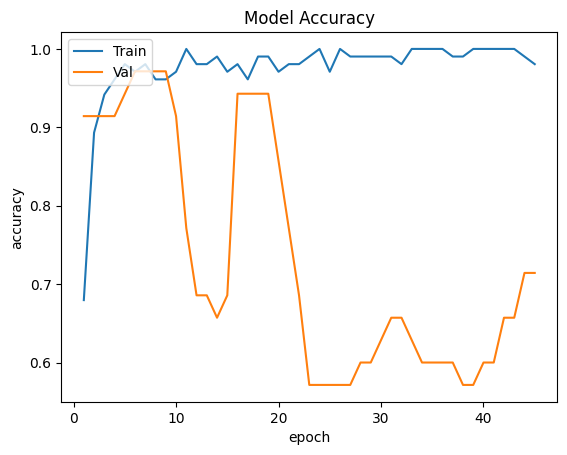

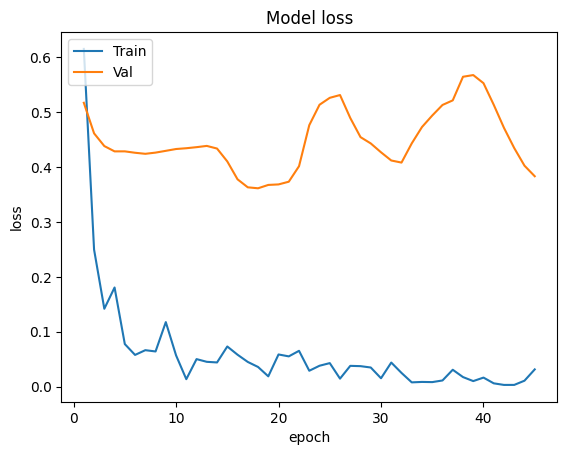

In [ ]:
plot_learning_curve(history,epochs)

## Adding MaxPool

#### **Pooling layers** are used to **reduce the dimensions** of the feature maps. Thus, it **reduces** the number of **parameters** to learn and the amount of **computation** performed in the network.

In [ ]:
# defining the hyperparameter
epochs = 100
model = Sequential()

# FIRST LAYER
model.add(Conv1D(64,2,activation = 'relu',input_shape = features_train[0].shape))
model.add(BatchNormalization())
'''Batch normalization is a technique for training very deep neural networks
   that standardizes the inputs to a layer for each mini-batch. This
   has the effect of stabilizing the learning process and dramatically
   reducing the number of training epochs required to train deep networks'''
model.add(MaxPool1D(2))
'''Max pooling is done to in part to help over-fitting by providing an abstracted form of the
   representation. As well, it reduces the computational cost by reducing the
   number of parameters to learn and provides basic translation invariance to
   the internal representation.'''
model.add(Dropout(0.2)) # prevents over-fitting (randomly remove some neurons)

# SECOND LAYER
model.add(Conv1D(128,2,activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

# Flattening the layer ( multidimentional data into vector)
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))

# FINAL LAYER
model.add(Dense(1,activation='sigmoid')) # binary classification

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 29, 64)            192       
                                                                 
 batch_normalization_2 (Bat  (None, 29, 64)            256       
 chNormalization)                                                
                                                                 
 max_pooling1d (MaxPooling1  (None, 14, 64)            0         
 D)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 14, 64)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 13, 128)           16512     
                                                                 
 batch_normalization_3 (Bat  (None, 13, 128)          

In [ ]:
# optimizing the model
model.compile(optimizer = Adam(lr=0.0001),loss = 'binary_crossentropy',metrics=['accuracy'])

# Training the model, Calculating the accuracy
history = model.fit(features_train, labels_train, epochs = epochs,
                    validation_data = (features_test,labels_test),verbose = 1)

Epoch 1/100
4/4 [==============================] - 4s 188ms/step - loss: 1.2087 - accuracy: 0.6505 - val_loss: 0.6250 - val_accuracy: 0.7143
Epoch 2/100
4/4 [==============================] - 0s 33ms/step - loss: 0.2128 - accuracy: 0.9126 - val_loss: 0.5712 - val_accuracy: 0.9714
Epoch 3/100
4/4 [==============================] - 0s 37ms/step - loss: 0.3153 - accuracy: 0.9029 - val_loss: 0.5324 - val_accuracy: 0.9429
Epoch 4/100
4/4 [==============================] - 0s 32ms/step - loss: 0.1851 - accuracy: 0.9223 - val_loss: 0.5071 - val_accuracy: 0.9429
Epoch 5/100
4/4 [==============================] - 0s 34ms/step - loss: 0.1177 - accuracy: 0.9515 - val_loss: 0.4910 - val_accuracy: 0.9143
Epoch 6/100
4/4 [==============================] - 0s 32ms/step - loss: 0.1358 - accuracy: 0.9612 - val_loss: 0.4807 - val_accuracy: 0.9143
Epoch 7/100
4/4 [==============================] - 0s 36ms/step - loss: 0.2023 - accuracy: 0.9417 - val_loss: 0.4705 - val_accuracy: 0.9143
Epoch 8/100
4/4 [==

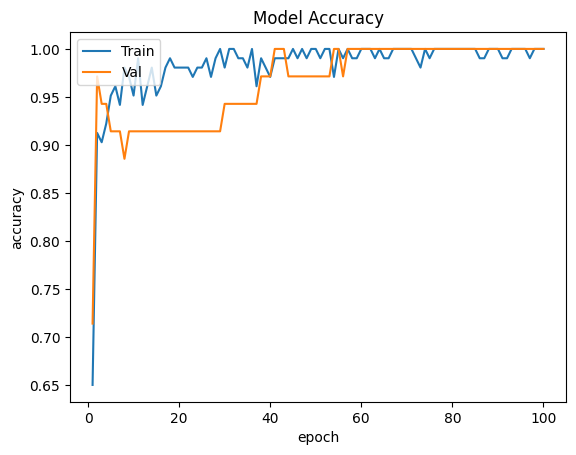

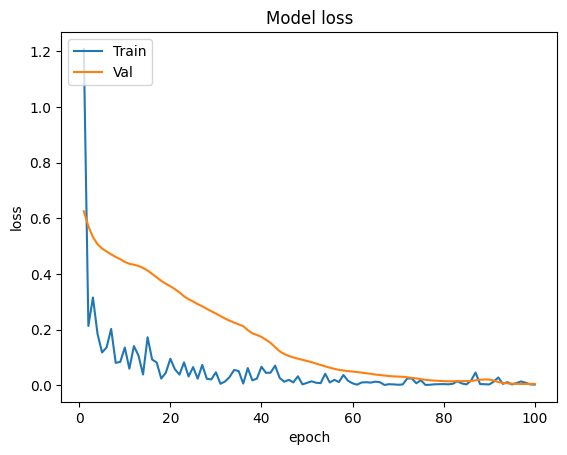

In [ ]:
# plotting learning curve (MAX POOL)
plot_learning_curve(history,epochs)

## Predicting

In [ ]:
final_acc = model.evaluate(features_train,labels_train)
final_acc

4/4 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000


[0.0015794711653143167, 1.0]

In [ ]:
pred = model.predict(features_test)
pred_label = pred.argmax(axis=1)

2/2 [==============================] - 0s 7ms/step


In [ ]:
cm =confusion_matrix(labels_test,pred.round())
cm

array([[18,  0],
       [ 0, 17]])